### Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.metrics import classification_report
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
cleaned_df = pd.read_csv('resources/cleaned_tweets.csv')

In [3]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
tf_idf_vectorizer.fit(cleaned_df['cleaned_text'])
tf_idf_df = tf_idf_vectorizer.transform(cleaned_df['cleaned_text'])
tf_idf_df = pd.DataFrame.sparse.from_spmatrix(tf_idf_df,columns=tf_idf_vectorizer.get_feature_names_out())
tf_idf_df

,aa,aaa,aaaa,aaaaa,aaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaah,aaaaaaaaaah,aaaaaaaaaajajajajajajajahahahajahaja,aaaaaaaahhhhhhh,aaaaah,...,zyrrlt,zython,zyvmzme,zyvmzmeea,zyxeq,zzoegrimm,zzsuo,zzz,zzzz,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pickle.dump(tf_idf_vectorizer, open('resources/tfidf_vect.pkl', 'wb'))

### Split train test data

In [5]:
X_df = tf_idf_df
y_df = cleaned_df['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, stratify=y_df, random_state=1234)

In [6]:
X_train

,aa,aaa,aaaa,aaaaa,aaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaah,aaaaaaaaaah,aaaaaaaaaajajajajajajajahahahajahaja,aaaaaaaahhhhhhh,aaaaah,...,zyrrlt,zython,zyvmzme,zyvmzmeea,zyxeq,zzoegrimm,zzsuo,zzz,zzzz,zzzzz
30803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_list = []
for n_neighbors in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    test_pred = knn_model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, test_pred))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


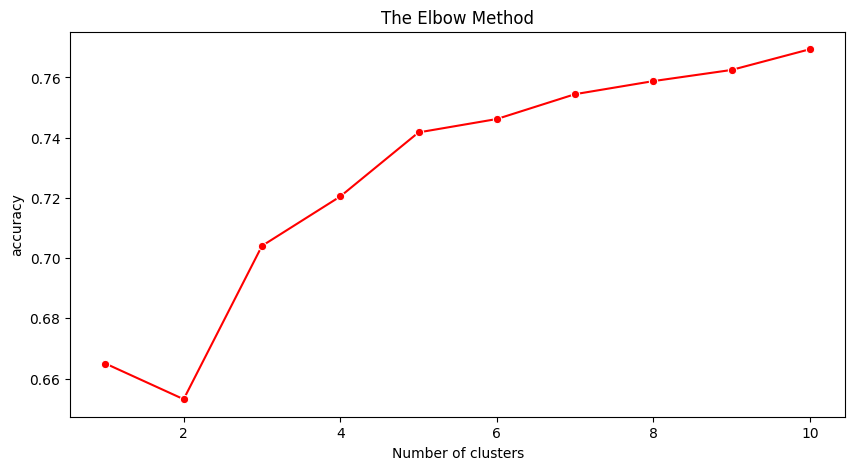

In [7]:
# Elbow Method to find optimal k
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=accuracy_list,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('accuracy')
plt.show()

In [8]:
kneedle_knn = KneeLocator(x=range(1, 11),y=accuracy_list, S=1.0, curve="concave", direction="increasing")
kneedle_knn.knee

1

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
test_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test, test_pred_knn)

0.7204699407281965

In [11]:
print(classification_report(y_test, test_pred_knn))

                     precision    recall  f1-score   support

                age       0.68      0.94      0.79      1577
          ethnicity       0.85      0.93      0.89      1567
             gender       0.81      0.79      0.80      1579
  not_cyberbullying       0.48      0.46      0.47      1579
other_cyberbullying       0.55      0.38      0.45      1552
           religion       0.92      0.81      0.86      1594

           accuracy                           0.72      9448
          macro avg       0.71      0.72      0.71      9448
       weighted avg       0.72      0.72      0.71      9448



In [12]:
pickle.dump(knn_model, open('bibooTaxed/knn_model.pkl', 'wb'))

### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
test_pred_dtc = dtc_model.predict(X_test)
accuracy_score(y_test, test_pred_dtc)

0.8039796782387807

In [22]:
print(classification_report(y_test, test_pred_dtc))

                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1577
          ethnicity       0.98      0.97      0.98      1567
             gender       0.87      0.85      0.86      1579
  not_cyberbullying       0.52      0.54      0.53      1579
other_cyberbullying       0.54      0.56      0.55      1552
           religion       0.95      0.93      0.94      1594

           accuracy                           0.80      9448
          macro avg       0.81      0.80      0.81      9448
       weighted avg       0.81      0.80      0.81      9448



In [23]:
pickle.dump(dtc_model, open('resources/dtc_model.pkl', 'wb'))

### Naive Bayes

In [12]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [13]:
test_pred_clf = clf.predict(X_test)
accuracy_score(y_test, test_pred_clf)

0.81731583403895

In [14]:
print(classification_report(y_test, test_pred_clf))

                     precision    recall  f1-score   support

                age       0.95      0.97      0.96      1577
          ethnicity       0.97      0.91      0.94      1567
             gender       0.91      0.75      0.83      1579
  not_cyberbullying       0.62      0.54      0.58      1579
other_cyberbullying       0.59      0.77      0.67      1552
           religion       0.92      0.95      0.93      1594

           accuracy                           0.82      9448
          macro avg       0.83      0.82      0.82      9448
       weighted avg       0.83      0.82      0.82      9448



In [15]:
pickle.dump(clf, open('resources/nb_model.pkl', 'wb'))

### SVM

In [16]:
from sklearn import svm
svm_model = svm.LinearSVC()
svm_model.fit(X_train, y_train)

c:\Users\NOHP\anaconda3\envs\SE_411\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [17]:
test_pred_svm = svm_model.predict(X_test)
accuracy_score(y_test, test_pred_svm)

0.8221845893310754

In [18]:
print(classification_report(y_test, test_pred_svm))

                     precision    recall  f1-score   support

                age       0.95      0.98      0.97      1577
          ethnicity       0.97      0.98      0.97      1567
             gender       0.89      0.85      0.87      1579
  not_cyberbullying       0.57      0.53      0.55      1579
other_cyberbullying       0.59      0.64      0.62      1552
           religion       0.95      0.95      0.95      1594

           accuracy                           0.82      9448
          macro avg       0.82      0.82      0.82      9448
       weighted avg       0.82      0.82      0.82      9448



In [19]:
pickle.dump(svm_model, open('resources/svm_model.pkl', 'wb'))